Problem statement: In this case study we are going to analyze and explore which are the factors and how based on those factors Aerofit can use its existing customer information to target their products to new customers in order to increase targeted sales.

Basic Metrics: The dataset has a total of 180 customers and a total of 9 columns/attributes which we are going to analyze to help us understand and decide what products to recommend to new customers in a better manner. The dataset has customers with age ranging from 18 to 50 which means it covers a wide range of customer base and also helpful in making better recommendations for all age groups.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('C:/Prakruthi/DSML/Aerofit - case study/aerofit_treadmill.csv')

In [3]:
df.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
# Basic Metrics
df.shape
# no. of rows/no. of customers
rows = df.shape[0]
print("no. of customers :",rows)
# no.of parameters of customers info available
cols = df.shape[1]
print("no. of parameters :",cols)
# Age group of the customer base available for analysis
print("minimum age :",df["Age"].min() , "maximum age :",df["Age"].max())
# Range of income of the customer base available for analysis
print("minimum income :",df["Income"].min() , "maximum income :",df["Income"].max())
# Range of miles of the customer base available for analysis
print("minimum miles :",df["Miles"].min() , "maximum miles :",df["Miles"].max())

no. of customers : 180
no. of parameters : 9
minimum age : 18 maximum age : 50
minimum income : 29562 maximum income : 104581
minimum miles : 21 maximum miles : 360


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
Product          180 non-null object
Age              180 non-null int64
Gender           180 non-null object
Education        180 non-null int64
MaritalStatus    180 non-null object
Usage            180 non-null int64
Fitness          180 non-null int64
Income           180 non-null int64
Miles            180 non-null int64
dtypes: int64(6), object(3)
memory usage: 12.7+ KB


# Missing value treatment

Since we do not have any missing values, missing values treatment is not required

# Conversion of categorical attributes to category

In [6]:
df["Product"] = df["Product"].astype('category')

In [7]:
df["Gender"] = df["Gender"].astype('category')

In [8]:
df["MaritalStatus"] = df["MaritalStatus"].astype('category')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
Product          180 non-null category
Age              180 non-null int64
Gender           180 non-null category
Education        180 non-null int64
MaritalStatus    180 non-null category
Usage            180 non-null int64
Fitness          180 non-null int64
Income           180 non-null int64
Miles            180 non-null int64
dtypes: category(3), int64(6)
memory usage: 9.3 KB


In [10]:
df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

1. KP281 - 80 customers
2. KP481 - 60 customers
3. KP781 - 40 customers

It can be seen that the product with lowest price among the 3 has more no. of customers 

In [11]:
df.groupby('Product')['Gender'].value_counts()

Product  Gender
KP281    Female    40
         Male      40
KP481    Male      31
         Female    29
KP781    Male      33
         Female     7
Name: Gender, dtype: int64

It can be observed that although products KP281 and KP481 has the same no. of customers, KP781 is much more popular among Males

In [12]:
df.groupby('Product')['Fitness'].value_counts()

Product  Fitness
KP281    3          54
         2          14
         4           9
         5           2
         1           1
KP481    3          39
         2          12
         4           8
         1           1
KP781    5          29
         4           7
         3           4
Name: Fitness, dtype: int64

It can be noticed here that products KP281 and KP481 are used by customers having mid range fitness levels
whereas KP781 is is being used by customers with high fitness levels

In [13]:
df.groupby('Product')['Education'].nunique()

Product
KP281    6
KP481    6
KP781    5
Name: Education, dtype: int64

It can be noticed here that all products have customers with almost the same levels of education

In [14]:
df.groupby('Product')['Age'].nunique()

Product
KP281    29
KP481    20
KP781    19
Name: Age, dtype: int64

It can be noticed here that Product KP281 has customers with a wider range of age group compared to other 2 

# We are going to do some analysis and draw important inferences based on the below visual Analysis

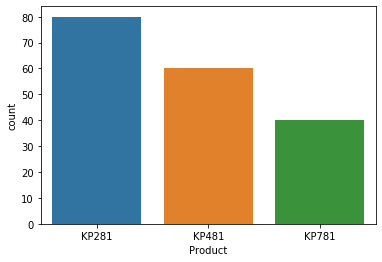

In [15]:
#Plot no.1
sns.countplot(data=df,
             x="Product")

As it can be seen here and also from previous non visual analysis, product KP281 has the highest no. of customer count

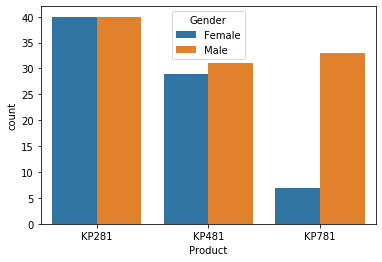

In [16]:
#Plot no.2
sns.countplot(data=df,
             x="Product",
            hue="Gender")

It can be noticed here that Product KP781 is much more popular among Males compared to Females.

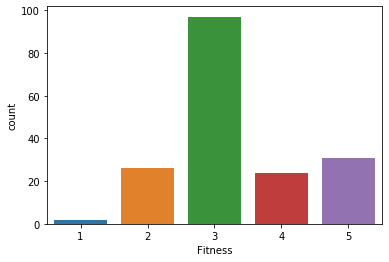

In [17]:
#Plot no.3
sns.countplot(data=df,
             x="Fitness")

It can be noticed here that customers with fitness level 3 i.e above average to good shape are the highest in number

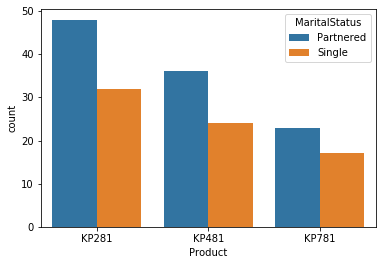

In [18]:
#Plot no.4
sns.countplot(data=df,
             x="Product",
            hue="MaritalStatus")

It is interesting to note that Partnered customers are more for each product type compared to Single customers

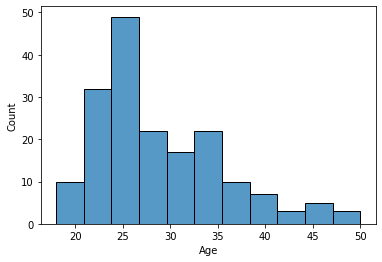

In [19]:
#plot no.5
sns.histplot(df["Age"])

It can be observed that customers from age range around 21 to 35 are very high in number compared to others

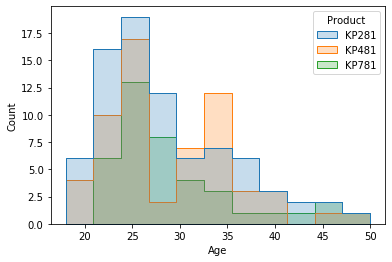

In [20]:
#Plot no.6
sns.histplot(data=df, x="Age", hue="Product",element='step')

In addition to knowing which age group has the highest no. of customers, here we can also see which product is more used by which age group. We can safely say that product KP281 is used by most age groups compared to other 2 products

C:\Users\sanke\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


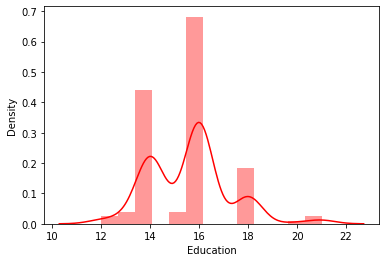

In [21]:
#Plot no.7
sns.distplot(df["Education"], color='Red')

In this dist plot we can observe that no. of customers with no. of years of education of 14 and 16 are the highest compared to others

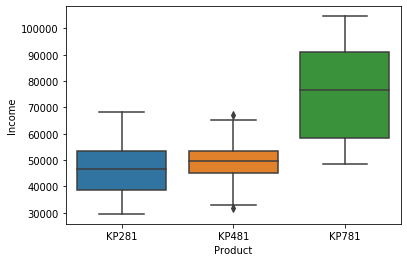

In [22]:
#Plot no.8
sns.boxplot(data=df,
           x="Product",
           y="Income")

here we can see that customers with comparitively lower income prefer products KP281 and KP781 over KP781

OUTLIERS IN TERMS OF INCOME : Using the above boxplot we can observe that the outliers in terms of income are only present for Product KP481. It can be noticed that people with only a small section of income are present for it.
Also, it can be seen that since the product KP781 has the highest price among the 3 prooducts, customers with income around mean income value and above purchase it.

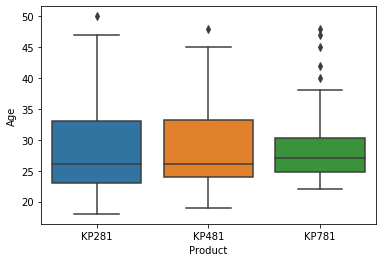

In [23]:
#Plot no.9
sns.boxplot(data=df,
           x="Product",
           y="Age")

here we can observe that product KP781 is more used by adults within age around 25-30 which is a smaller range compared to the other 2 products

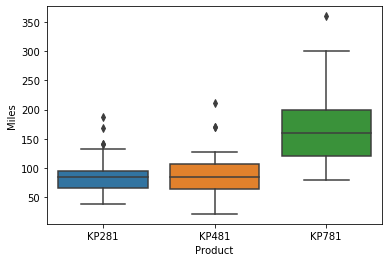

In [24]:
#Plot no.10
sns.boxplot(data=df,
           x="Product",
           y="Miles")

Here we can observe that customers with comparatively lesser fitness goals prefer products KP281 and KP481 over KP781

OUTLIERS IN TERMS OF MILES : Using the above boxplot we can clearly notice that all 3 products have a few customers running a lot of extra miles every week when compared to the rest of the distribution.

In [25]:
df1 = df[["Product", "Age", "Usage", "Income", "Miles"]]

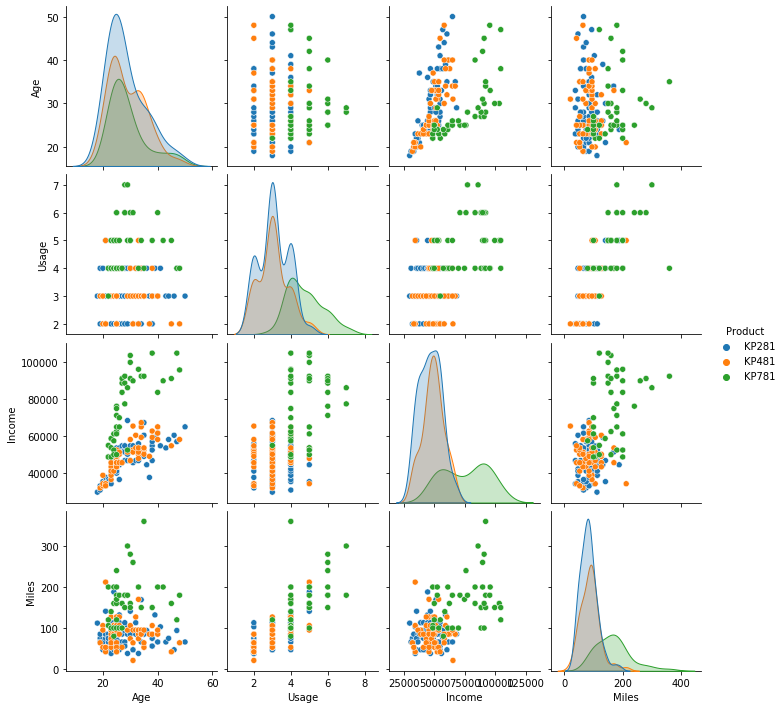

In [26]:
#Plot no.11
sns.pairplot(data=df1,hue="Product")

Here to create the above pair plot, more meaningful attributes which we can use for our analysis have been filtered.
1. Usage versus Miles is on the lower side of Usage for KP281 compared to KP781
2. Income versus Age is spread more on the higher income end for KP781 and KP281 is much more concentrated on lower side
3. Miles versus Age is more concentrated on the lower Miles end for all age groups for KP281 and the Miles is more spread for KP781

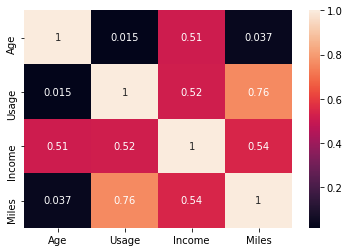

In [27]:
#Plot no.12
sns.heatmap(df1.corr(),annot=True)

We can notice that INCOME and AGE(among other combinations) have good correlation with each other which can be used for targetted marketing.

Also, from the above heatmap we can observe that the least correlation is of AGE with MILES and USAGE. 
Which means these factors have very less dependency on each other.

In [28]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [29]:
df.median()

Age             26.0
Education       16.0
Usage            3.0
Fitness          3.0
Income       50596.5
Miles           94.0
dtype: float64

by looking at the results from .describe() method and median() values we can infer that
1. There are some outliers on the upper end for Miles since the difference between mean and median is quite noticable
2. It is also possible that there are some outliers for Income since there is some difference between mean and median values 
for income

NOTE : The same have been observed from the boxplots previously

# two-way contingency table

In [30]:
male_female_data = pd.crosstab(index=df["Product"], columns=df["Gender"], margins=True)
male_female_data

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


# Marginal probability - Contingency table

In [31]:
#probability of customers using product KP281
prob_KP281 = male_female_data.iloc[0, 2] / male_female_data.iloc[3, 2]
print("probability of customers using product KP281 : ",round(prob_KP281*100,2),"%")

#probability of customers using product KP481
prob_KP481 = male_female_data.iloc[1, 2] / male_female_data.iloc[3, 2]
print("probability of customers using product KP481 : ",round(prob_KP481*100,2),"%")

#probability of customers using product KP781
prob_KP781 = male_female_data.iloc[2, 2] / male_female_data.iloc[3, 2]
print("probability of customers using product KP781 : ",round(prob_KP781*100,2),"%")

#probability of customers being Female
prob_female = male_female_data.iloc[3, 0] / male_female_data.iloc[3, 2]
print("probability of customers being Female : ",round(prob_female*100,2),"%")

#probability of customers being Male
prob_male = male_female_data.iloc[3, 1] / male_female_data.iloc[3, 2]
print("probability of customers being Male : ",round(prob_male*100,2),"%")

probability of customers using product KP281 :  44.44 %
probability of customers using product KP481 :  33.33 %
probability of customers using product KP781 :  22.22 %
probability of customers being Female :  42.22 %
probability of customers being Male :  57.78 %


# Marginal probability - alternate way

In [32]:
df_prod_KP281 = df[(df["Product"] == 'KP281')]
prob_prod_KP281 = len(df_prod_KP281) / len(df)
print("probability of customers using product KP281 :",round(prob_prod_KP281*100,2),"%")

df_prod_KP481 = df[(df["Product"] == 'KP481')]
prob_prod_KP481 = len(df_prod_KP481) / len(df)
print("probability of customers using product KP481 :",round(prob_prod_KP481*100,2),"%")

df_prod_KP781 = df[(df["Product"] == 'KP781')]
prob_prod_KP781 = len(df_prod_KP781) / len(df)
print("probability of customers using product KP781 :",round(prob_prod_KP781*100,2),"%")

df_prod_Male = df[(df["Gender"] == 'Male')]
prob_prod_Male = len(df_prod_Male) / len(df)
print("probability of customers using being Male :",round(prob_prod_Male*100,2),"%")

df_prod_Female = df[(df["Gender"] == 'Female')]
prob_prod_Female = len(df_prod_Female) / len(df)
print("probability of customers using being Female :",round(prob_prod_Female*100,2),"%")

probability of customers using product KP281 : 44.44 %
probability of customers using product KP481 : 33.33 %
probability of customers using product KP781 : 22.22 %
probability of customers using being Male : 57.78 %
probability of customers using being Female : 42.22 %


# Other observations(A intersection B)

In [33]:
df_prod_KP281_male = df[(df["Product"] == 'KP281') & (df["Gender"] == 'Male')]
prob_prod_KP281_male = len(df_prod_KP281_male) / len(df)
print("probability of Males using product KP281 :",round(prob_prod_KP281_male*100,2),"%")

df_prod_KP281_female = df[(df["Product"] == 'KP281') & (df["Gender"] == 'Female')]
prob_prod_KP281_female = len(df_prod_KP281_female) / len(df)
print("probability of Females using product KP281 :",round(prob_prod_KP281_female*100,2),"%")

df_prod_KP481_male = df[(df["Product"] == 'KP481') & (df["Gender"] == 'Male')]
prob_prod_KP481_male = len(df_prod_KP481_male) / len(df)
print("probability of Males using product KP481 :",round(prob_prod_KP481_male*100,2),"%")

df_prod_KP481_female = df[(df["Product"] == 'KP481') & (df["Gender"] == 'Female')]
prob_prod_KP481_female = len(df_prod_KP481_female) / len(df)
print("probability of Females using product KP481 :",round(prob_prod_KP481_female*100,2),"%")

df_prod_KP781_male = df[(df["Product"] == 'KP781') & (df["Gender"] == 'Male')]
prob_prod_KP781_male = len(df_prod_KP781_male) / len(df)
print("probability of Males using product KP781 :",round(prob_prod_KP781_male*100,2),"%")

df_prod_KP781_female = df[(df["Product"] == 'KP781') & (df["Gender"] == 'Female')]
prob_prod_KP781_female = len(df_prod_KP781_female) / len(df)
print("probability of Females using product KP781 :",round(prob_prod_KP781_female*100,2),"%")

probability of Males using product KP281 : 22.22 %
probability of Females using product KP281 : 22.22 %
probability of Males using product KP481 : 17.22 %
probability of Females using product KP481 : 16.11 %
probability of Males using product KP781 : 18.33 %
probability of Females using product KP781 : 3.89 %


In [34]:
df_prod_KP281_income = df[(df["Product"] == 'KP281') & 
                          (df["Income"] >= np.median(df["Income"]))]
prob_prod_KP281_income = len(df_prod_KP281_income) / len(df)
print("probability of customers buying Product KP281 with income above the median value:",round(prob_prod_KP281_income*100,2),"%")

df_prod_KP281_income1 = df[(df["Product"] == 'KP281') & 
                           (df["Income"] < np.median(df["Income"]))]
prob_prod_KP281_income1 = len(df_prod_KP281_income1) / len(df)
print("probability of customers buying Product KP281 with income below the median value:",round(prob_prod_KP281_income1*100,2),"%")

df_prod_KP481_income = df[(df["Product"] == 'KP481') & 
                          (df["Income"] >= np.median(df["Income"]))]
prob_prod_KP481_income = len(df_prod_KP481_income) / len(df)
print("probability of customers buying Product KP481 with income above the median value:",round(prob_prod_KP481_income*100,2),"%")

df_prod_KP481_income1 = df[(df["Product"] == 'KP481') & 
                           (df["Income"] < np.median(df["Income"]))]
prob_prod_KP481_income1 = len(df_prod_KP481_income1) / len(df)
print("probability of customers buying Product KP481 with income below the median value:",round(prob_prod_KP481_income1*100,2),"%")

df_prod_KP781_income = df[(df["Product"] == 'KP781') & 
                          (df["Income"] >= np.median(df["Income"]))]
prob_prod_KP781_income = len(df_prod_KP781_income) / len(df)
print("probability of customers buying Product KP781 with income above the median value:",round(prob_prod_KP781_income*100,2),"%")

df_prod_KP781_income1 = df[(df["Product"] == 'KP781') & 
                           (df["Income"] < np.median(df["Income"]))]
prob_prod_KP781_income1 = len(df_prod_KP781_income1) / len(df)
print("probability of customers buying Product KP781 with income above the median value:",round(prob_prod_KP781_income1*100,2),"%")

probability of customers buying Product KP281 with income above the median value: 16.67 %
probability of customers buying Product KP281 with income below the median value: 27.78 %
probability of customers buying Product KP481 with income above the median value: 13.89 %
probability of customers buying Product KP481 with income below the median value: 19.44 %
probability of customers buying Product KP781 with income above the median value: 19.44 %
probability of customers buying Product KP781 with income above the median value: 2.78 %


# Conditional probability using contingency table

In [35]:
#probability that a product is KP281 given the customer is Female
prob_KP281_female_cond_cntgy = male_female_data.iloc[0, 0] / male_female_data.iloc[3, 0]
print("probability that a product is KP281 given the customer is Female : ",
      round(prob_KP281_female_cond_cntgy*100,2),"%")

#probability that a product is KP481 given the customer is Female
prob_KP481_female_cond_cntgy = male_female_data.iloc[1, 0] / male_female_data.iloc[3, 0]
print("probability that a product is KP481 given the customer is Female : ",
      round(prob_KP481_female_cond_cntgy*100,2),"%")

#probability that a product is KP781 given the customer is Female
prob_KP781_female_cond_cntgy = male_female_data.iloc[2, 0] / male_female_data.iloc[3, 0]
print("probability that a product is KP781 given the customer is Female : ",
      round(prob_KP781_female_cond_cntgy*100,2),"%")

#probability that a product is KP281 given the customer is Male
prob_KP281_male_cond_cntgy = male_female_data.iloc[0, 1] / male_female_data.iloc[3, 1]
print("probability that a product is KP281 given the customer is Male : ",
      round(prob_KP281_male_cond_cntgy*100,2),"%")

#probability that a product is KP481 given the customer is Male
prob_KP481_male_cond_cntgy = male_female_data.iloc[1, 1] / male_female_data.iloc[3, 1]
print("probability that a product is KP481 given the customer is Male : ",
      round(prob_KP481_male_cond_cntgy*100,2),"%")

#probability that a product is KP781 given the customer is Male
prob_KP781_male_cond_cntgy = male_female_data.iloc[2, 1] / male_female_data.iloc[3, 1]
print("probability that a product is KP781 given the customer is Male : ",
      round(prob_KP781_male_cond_cntgy*100,2),"%")

probability that a product is KP281 given the customer is Female :  52.63 %
probability that a product is KP481 given the customer is Female :  38.16 %
probability that a product is KP781 given the customer is Female :  9.21 %
probability that a product is KP281 given the customer is Male :  38.46 %
probability that a product is KP481 given the customer is Male :  29.81 %
probability that a product is KP781 given the customer is Male :  31.73 %


# Conditional probability - alternate way

In [36]:
#probability that a product is KP281 given the customer is Female
#P(KP281|F) = P(KP281 n F) / P(F)
prob_female = len(df[(df["Gender"]) == 'Female']) / len(df)
prob_KP281_female_cond = prob_prod_KP281_female / prob_female
print("probability that a product is KP281 given the customer is Female : ",
      round(prob_KP281_female_cond*100,2),"%")

#probability that a product is KP481 given the customer is Female
#P(KP481|F) = P(KP481 n F) / P(F)
prob_female = len(df[(df["Gender"]) == 'Female']) / len(df)
prob_KP481_female_cond = prob_prod_KP481_female / prob_female
print("probability that a product is KP481 given the customer is Female : ",
      round(prob_KP481_female_cond*100,2),"%")

#probability that a product is KP781 given the customer is Female
#P(KP781|F) = P(KP781 n F) / P(F)
prob_female = len(df[(df["Gender"]) == 'Female']) / len(df)
prob_KP781_female_cond = prob_prod_KP781_female / prob_female
print("probability that a product is KP781 given the customer is Female : ",
      round(prob_KP781_female_cond*100,2),"%")

#probability that a product is KP281 given the customer is Male
#P(KP281|M) = P(KP281 n M) / P(M)
prob_male = len(df[(df["Gender"]) == 'Male']) / len(df)
prob_KP281_male_cond = prob_prod_KP281_male / prob_male
print("probability that a product is KP281 given the customer is Male : ",
      round(prob_KP281_male_cond*100,2),"%")

#probability that a product is KP481 given the customer is Male
#P(KP481|M) = P(KP481 n M) / P(M)
prob_male = len(df[(df["Gender"]) == 'Male']) / len(df)
prob_KP481_male_cond = prob_prod_KP481_male / prob_male
print("probability that a product is KP481 given the customer is Male : ",
      round(prob_KP481_male_cond*100,2),"%")

#probability that a product is KP781 given the customer is Male
#P(KP781|M) = P(KP781 n M) / P(M)
prob_male = len(df[(df["Gender"]) == 'Male']) / len(df)
prob_KP781_male_cond = prob_prod_KP781_male / prob_male
print("probability that a product is KP781 given the customer is Male : ",
      round(prob_KP781_male_cond*100,2),"%")

probability that a product is KP281 given the customer is Female :  52.63 %
probability that a product is KP481 given the customer is Female :  38.16 %
probability that a product is KP781 given the customer is Female :  9.21 %
probability that a product is KP281 given the customer is Male :  38.46 %
probability that a product is KP481 given the customer is Male :  29.81 %
probability that a product is KP781 given the customer is Male :  31.73 %
